In [27]:
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter
pio.templates.default = "plotly_white"

data = pd.read_csv("Instagram-Reach.csv", encoding='latin-1')
print(data.head())

                  Date  Instagram reach
0  2022-04-01T00:00:00             7620
1  2022-04-02T00:00:00            12859
2  2022-04-03T00:00:00            16008
3  2022-04-04T00:00:00            24349
4  2022-04-05T00:00:00            20532


In [11]:
data['Date'] = pd.to_datetime(data['Date'])
print(data.head())

        Date  Instagram reach
0 2022-04-01             7620
1 2022-04-02            12859
2 2022-04-03            16008
3 2022-04-04            24349
4 2022-04-05            20532


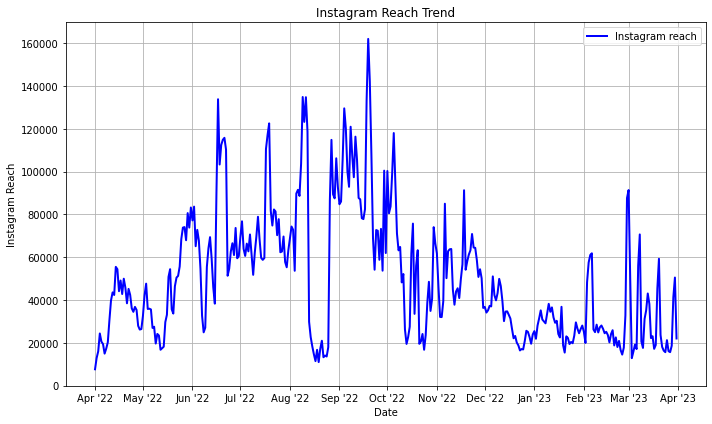

In [29]:

from matplotlib.dates import MonthLocator, DateFormatter

data = pd.read_csv("Instagram-Reach.csv", encoding='latin-1')
data['Date'] = pd.to_datetime(data['Date'])

plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Instagram reach'], label='Instagram reach', color='b', linewidth=2)

# Set the x-axis locator and formatter to display months with the year
months = MonthLocator()
date_format = DateFormatter("%b '%y")
plt.gca().xaxis.set_major_locator(months)
plt.gca().xaxis.set_major_formatter(date_format)

plt.title('Instagram Reach Trend')
plt.xlabel('Date')
plt.ylabel('Instagram Reach')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


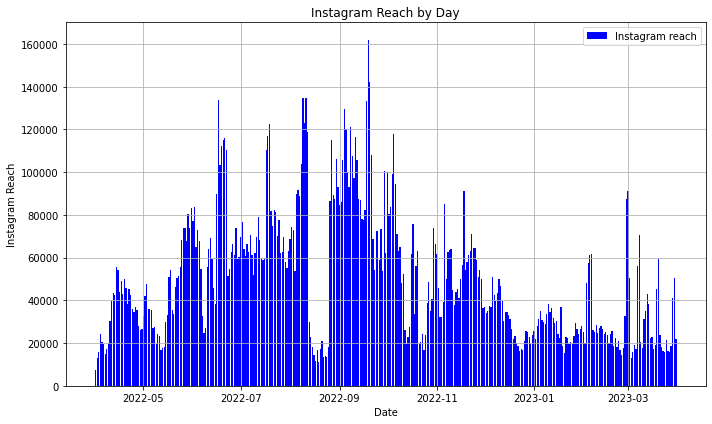

In [32]:
plt.figure(figsize=(10, 6))
plt.bar(data['Date'], data['Instagram reach'], label='Instagram reach', color='b')

plt.title('Instagram Reach by Day')
plt.xlabel('Date')
plt.ylabel('Instagram Reach')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

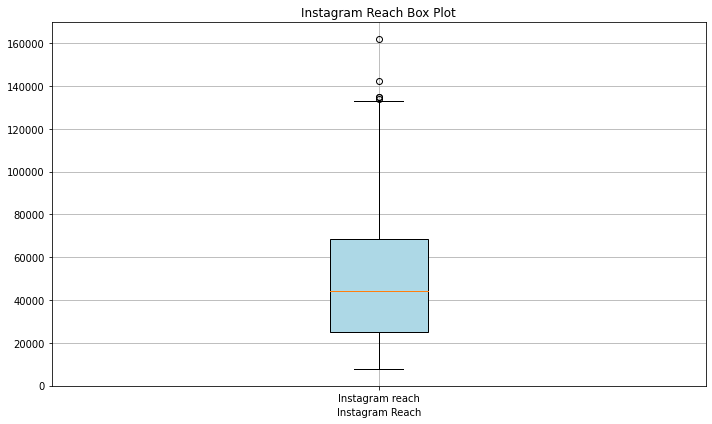

In [40]:
box_color = 'lightblue'

plt.figure(figsize=(10, 6))
box = plt.boxplot(data['Instagram reach'], vert=True, labels=['Instagram reach'], patch_artist=True)

# Set the box color
for patch in box['boxes']:
    patch.set_facecolor(box_color)

plt.title('Instagram Reach Box Plot')
plt.xlabel('Instagram Reach')
plt.ylabel('')  # Remove the y-axis label for the box plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
data['Day'] = data['Date'].dt.day_name()
print(data.head())

        Date  Instagram reach       Day
0 2022-04-01             7620    Friday
1 2022-04-02            12859  Saturday
2 2022-04-03            16008    Sunday
3 2022-04-04            24349    Monday
4 2022-04-05            20532   Tuesday


In [17]:
import numpy as np

day_stats = data.groupby('Day')['Instagram reach'].agg(['mean', 'median', 'std']).reset_index()
print(day_stats)

         Day          mean   median           std
0     Friday  46666.849057  35574.0  29856.943036
1     Monday  52621.692308  46853.0  32296.071347
2   Saturday  47374.750000  40012.0  27667.043634
3     Sunday  53114.173077  47797.0  30906.162384
4   Thursday  48570.923077  39150.0  28623.220625
5    Tuesday  54030.557692  48786.0  32503.726482
6  Wednesday  51017.269231  42320.5  29047.869685


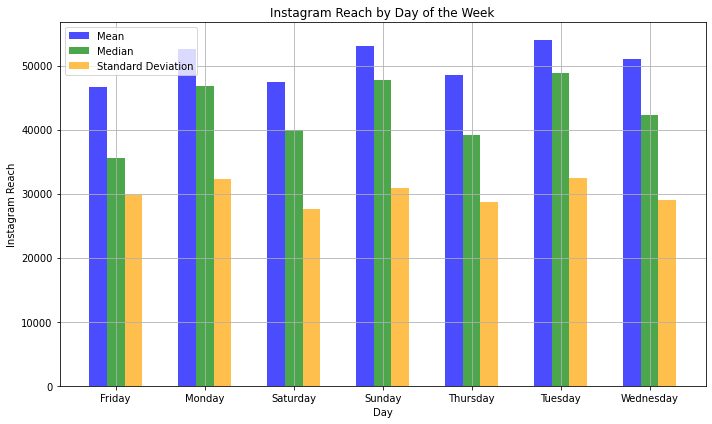

In [42]:

plt.figure(figsize=(10, 6))

# Calculate the positions for each group of bars
x = range(len(day_stats['Day']))
width = 0.2

# Plot the bars for 'Mean'
plt.bar(x, day_stats['mean'], width, label='Mean', color='blue', alpha=0.7)

# Plot the bars for 'Median'
plt.bar([i + width for i in x], day_stats['median'], width, label='Median', color='green', alpha=0.7)

# Plot the bars for 'Standard Deviation'
plt.bar([i + 2*width for i in x], day_stats['std'], width, label='Standard Deviation', color='orange', alpha=0.7)

# Set the x-axis ticks and labels
plt.xticks([i + width for i in x], day_stats['Day'])

plt.title('Instagram Reach by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Instagram Reach')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


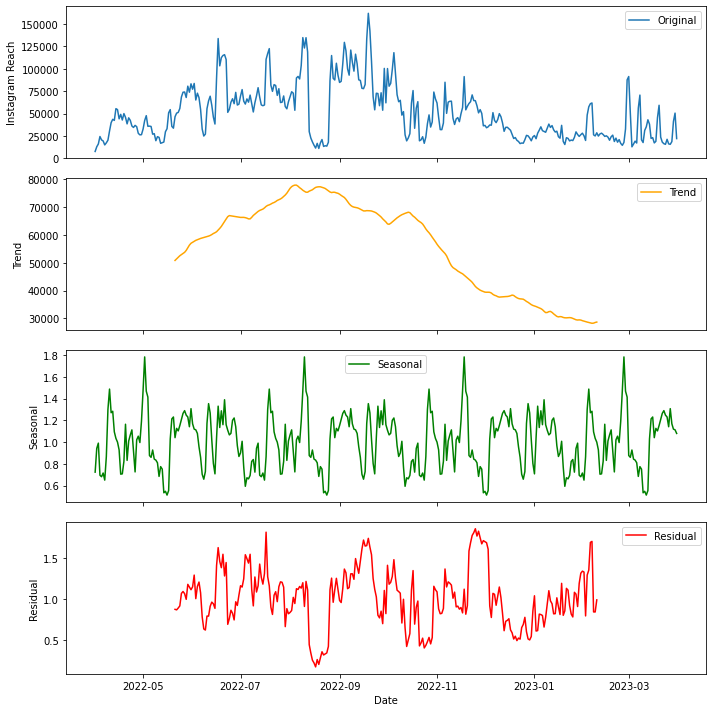

In [43]:

from statsmodels.tsa.seasonal import seasonal_decompose

data = pd.read_csv("Instagram-Reach.csv", encoding='latin-1')
data['Date'] = pd.to_datetime(data['Date'])
data = data[["Date", "Instagram reach"]]

result = seasonal_decompose(data['Instagram reach'], 
                            model='multiplicative', 
                            period=100)

# Set up the subplots and plot each component
fig, axes = plt.subplots(4, 1, figsize=(10, 10), sharex=True)

axes[0].plot(data['Date'], data['Instagram reach'], label='Original')
axes[0].legend()
axes[0].set_ylabel('Instagram Reach')

axes[1].plot(data['Date'], result.trend, label='Trend', color='orange')
axes[1].legend()
axes[1].set_ylabel('Trend')

axes[2].plot(data['Date'], result.seasonal, label='Seasonal', color='green')
axes[2].legend()
axes[2].set_ylabel('Seasonal')

axes[3].plot(data['Date'], result.resid, label='Residual', color='red')
axes[3].legend()
axes[3].set_ylabel('Residual')

plt.xlabel('Date')
plt.tight_layout()
plt.show()


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

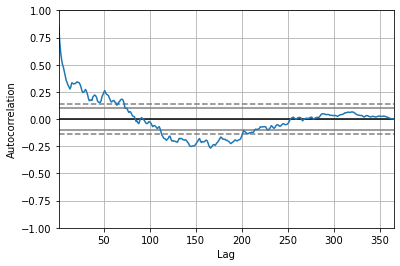

In [44]:
pd.plotting.autocorrelation_plot(data["Instagram reach"])

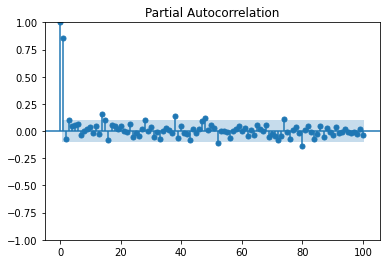

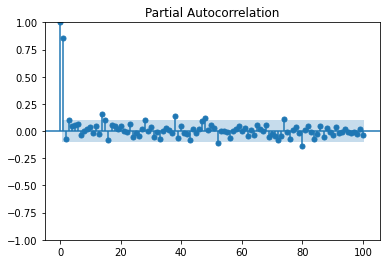

In [56]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Instagram reach"], lags = 100)

In [46]:
p, d, q = 8, 1, 2

import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Instagram reach'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

c:\Users\writv\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                     SARIMAX Results                                      
Dep. Variable:                    Instagram reach   No. Observations:                  365
Model:             SARIMAX(8, 1, 2)x(8, 1, 2, 12)   Log Likelihood               -3938.517
Date:                            Mon, 31 Jul 2023   AIC                           7919.034
Time:                                    01:30:52   BIC                           8000.171
Sample:                                         0   HQIC                          7951.323
                                            - 365                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1880      6.370      0.030      0.976     -12.296      12.672
ar.L2          0.4759      5.920   

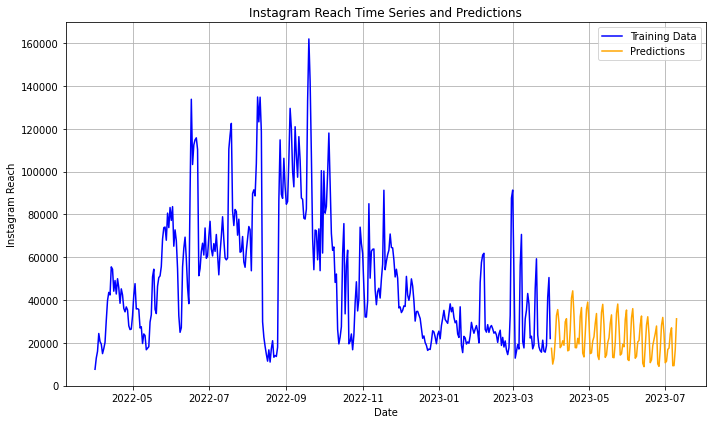

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a DataFrame 'data' and a model 'model' for predictions

# Generate predictions
predictions = model.predict(start=len(data), end=len(data)+100, dynamic=False)

# Create a DatetimeIndex for predictions
last_date = data['Date'].iloc[-1]
pred_index = pd.date_range(start=last_date + pd.DateOffset(days=1), periods=101, freq='D')

# Plot the training data
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data["Instagram reach"], label="Training Data", color="blue")

# Plot the predictions as an extension of the training data in blue
plt.plot(pred_index, predictions, label="Predictions", color="orange")

plt.title("Instagram Reach Time Series and Predictions")
plt.xlabel("Date")
plt.ylabel("Instagram Reach")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
